In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = './datascienceforbusiness-master/hr_data.csv'
hr_df = pd.read_csv(filename)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [4]:
hr_df.shape

(14999, 9)

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
#which column as categotical
hr_df.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [7]:
print(hr_df.department.unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [8]:
len(hr_df)

14999

In [9]:
emp_satis_eval = pd.read_excel('./datascienceforbusiness-master/employee_satisfaction_evaluation.xlsx')
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [10]:
emp_satis_eval.shape

(14999, 3)

# Merge or join Two dataframe

In [11]:
#Merging
main_df = hr_df.set_index(['employee_id']).join(emp_satis_eval.set_index(['EMPLOYEE #']))
main_df =  main_df.reset_index()
main_df.head(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
5,1060,2,153,3,0,1,0,sales,low,0.41,0.50
6,1061,6,247,4,0,1,0,sales,low,0.10,0.77
7,1576,5,259,5,0,1,0,sales,low,0.92,0.85
8,1752,5,224,5,0,1,0,sales,low,0.89,1.00
9,1988,2,142,3,0,1,0,sales,low,0.42,0.53


In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
satisfaction_level       14972 non-null float64
last_evaluation          14972 non-null float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [13]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [14]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [15]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
main_df.fillna(main_df.mean(), inplace=True)

In [17]:
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [18]:
# main_df[main_df['employee_id'] == 3794 ]
main_df.loc[main_df['employee_id'] == 3794 ]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [19]:
main_df_final = main_df.drop(columns=['employee_id'])
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [20]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [21]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [22]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [23]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Correlation Matrix

No handles with labels found to put in legend.


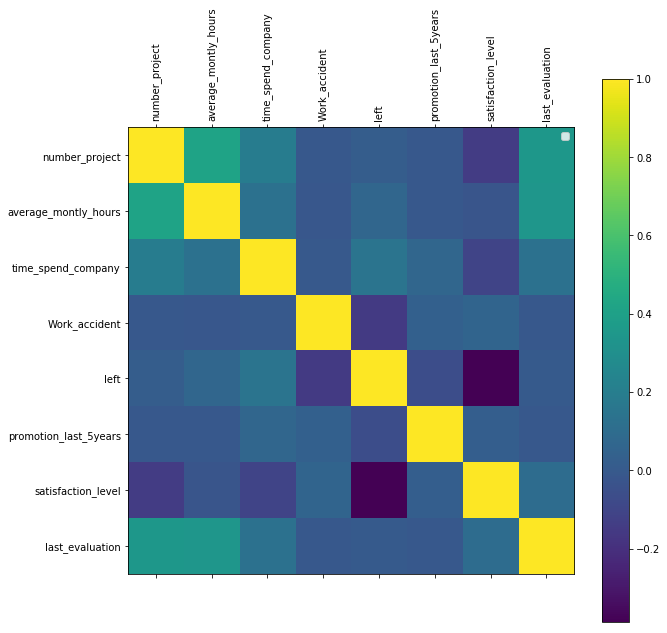

In [24]:
def plot_corr(df, size=10):
    
    
    corr = df.corr()
    fig, ax  = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

    
plot_corr(main_df_final)

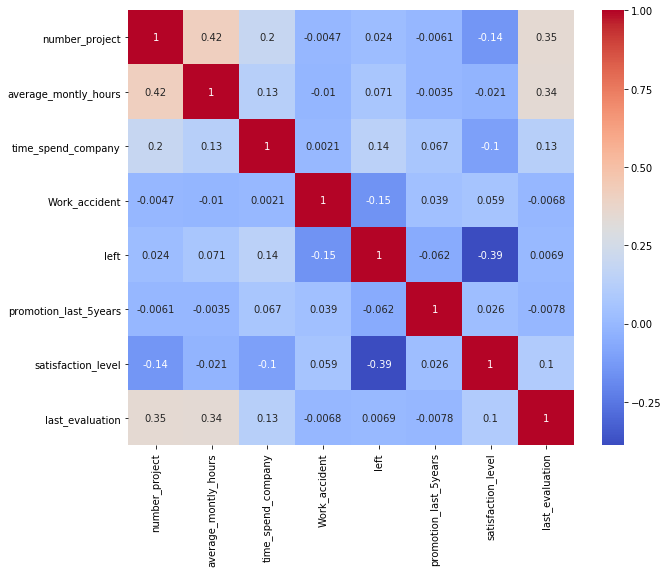

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(main_df_final.corr(), annot=True, cmap='coolwarm', ax=ax)

# Data Cleaning

In [26]:
categorical = ['department', 'salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [27]:
main_df_final.shape

(14999, 19)

In [28]:
len(main_df_final[main_df_final['left'] == 1])

3571

# Praparing Our dataset for machine learning model

In [29]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(['left'], axis=True).values

y= main_df_final['left'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
X_train.shape, X_test.shape

((10499, 18), (4500, 18))

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.160997,0.247190,-0.339246,-0.411758,-0.148991,1.043268,-1.319760,-0.236247,-0.233538,-0.227581,-0.209146,-0.245760,-0.245324,-0.620705,-0.418852,2.133562,1.018361,-0.862398
1,1.777746,1.689158,0.350881,-0.411758,-0.148991,0.358316,-1.904013,-0.236247,-0.233538,-0.227581,-0.209146,-0.245760,-0.245324,1.611070,-0.418852,-0.468700,1.018361,-0.862398
2,0.160997,1.268584,0.350881,-0.411758,-0.148991,-0.286344,0.549849,-0.236247,-0.233538,-0.227581,-0.209146,-0.245760,-0.245324,-0.620705,-0.418852,2.133562,-0.981970,1.159557
3,0.969372,0.587654,-1.029372,-0.411758,-0.148991,1.002977,0.316147,-0.236247,-0.233538,-0.227581,-0.209146,-0.245760,-0.245324,1.611070,-0.418852,-0.468700,-0.981970,1.159557
4,-0.647377,-0.573931,4.491640,-0.411758,6.711799,-1.132461,-0.384956,-0.236247,-0.233538,-0.227581,-0.209146,4.069012,-0.245324,-0.620705,-0.418852,-0.468700,-0.981970,-0.862398


In [34]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,1.554460e-16,-4.032608e-17,-1.999755e-16,-3.629295e-16,-1.583064e-16,2.796178e-14,2.397917e-14,4.426934e-16,-1.002463e-15,3.235234e-16,8.082295e-16,-4.921453e-16,-5.235835e-16,1.820939e-17,-1.666551e-15,5.932169e-16,1.174263e-15,-4.027638e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.455752e+00,-2.096009e+00,-1.029372e+00,-4.117577e-01,-1.489914e-01,-2.099451e+00,-2.079289e+00,-2.362468e-01,-2.335380e-01,-2.275813e-01,-2.091457e-01,-2.457599e-01,-2.453238e-01,-6.207053e-01,-4.188516e-01,-4.686997e-01,-9.819703e-01,-8.623980e-01
25%,-6.473772e-01,-8.943689e-01,-3.392459e-01,-4.117577e-01,-1.489914e-01,-6.892567e-01,-9.107832e-01,-2.362468e-01,-2.335380e-01,-2.275813e-01,-2.091457e-01,-2.457599e-01,-2.453238e-01,-6.207053e-01,-4.188516e-01,-4.686997e-01,-9.819703e-01,-8.623980e-01
50%,1.609973e-01,-3.319323e-02,-3.392459e-01,-4.117577e-01,-1.489914e-01,1.165687e-01,2.402113e-02,-2.362468e-01,-2.335380e-01,-2.275813e-01,-2.091457e-01,-2.457599e-01,-2.453238e-01,-6.207053e-01,-4.188516e-01,-4.686997e-01,-9.819703e-01,-8.623980e-01
75%,9.693719e-01,8.880644e-01,3.508806e-01,-4.117577e-01,-1.489914e-01,8.015203e-01,9.004002e-01,-2.362468e-01,-2.335380e-01,-2.275813e-01,-2.091457e-01,-2.457599e-01,-2.453238e-01,1.611070e+00,-4.188516e-01,-4.686997e-01,1.018361e+00,1.159557e+00
max,2.586121e+00,2.189842e+00,4.491640e+00,2.428613e+00,6.711799e+00,1.567054e+00,1.659929e+00,4.232862e+00,4.281959e+00,4.394035e+00,4.781356e+00,4.069012e+00,4.076245e+00,1.611070e+00,2.387481e+00,2.133562e+00,1.018361e+00,1.159557e+00


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [36]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [37]:
print('Accuracy {0:.2f}%'.format(100*accuracy_score(prediction, y_test)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy 79.98%
[[3180  258]
 [ 643  419]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      3438
           1       0.62      0.39      0.48      1062

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500



# Random forest clasifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy {0:.2f}%'.format(100* accuracy_score(prediction, y_test)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy 98.11%
[[3424   14]
 [  71  991]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3438
           1       0.99      0.93      0.96      1062

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Deep Learning1

In [39]:
import tensorflow.keras

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model= Sequential()

model.add(Dense(9, kernel_initializer = 'uniform', activation='relu', input_dim=18))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

W0121 20:45:16.611754 140390100375360 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0121 20:45:16.772932 140390100375360 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
batch_size = 10
epochs = 10

history = model.fit(X_train,
                    y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose = 1,
                   validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss : ', score[0])
print('Test Accuracy : ', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/10
10499/10499 [==============================] - 2s 196us/sample - loss: 0.4297 - acc: 0.7914 - val_loss: 0.3128 - val_acc: 0.8196
Epoch 2/10
10499/10499 [==============================] - 1s 120us/sample - loss: 0.2662 - acc: 0.8527 - val_loss: 0.2459 - val_acc: 0.9136
Epoch 3/10
10499/10499 [==============================] - 1s 104us/sample - loss: 0.2238 - acc: 0.9329 - val_loss: 0.2192 - val_acc: 0.9427
Epoch 4/10
10499/10499 [==============================] - 1s 112us/sample - loss: 0.2028 - acc: 0.9499 - val_loss: 0.2032 - val_acc: 0.9464
Epoch 5/10
10499/10499 [==============================] - 1s 114us/sample - loss: 0.1889 - acc: 0.9537 - val_loss: 0.1939 - val_acc: 0.9500
Epoch 6/10
10499/10499 [==============================] - 1s 118us/sample - loss: 0.1801 - acc: 0.9572 - val_loss: 0.1861 - val_acc: 0.9529
Epoch 7/10
10499/10499 [==============================] - 1s 111us/sample - loss: 0.1737 - acc: 0.9572 - val_lo

In [52]:
hist = history.history
hist['loss']

[0.4297437892840163,
 0.2662107747710595,
 0.2237879733953042,
 0.20283237745816315,
 0.18892980557325734,
 0.1801338967384547,
 0.17373841150165886,
 0.16942319769521566,
 0.16614631386643203,
 0.16388859070387937]

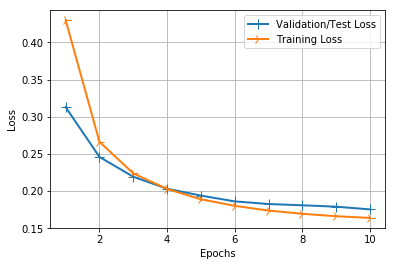

In [44]:
#ploting our loss

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)


line1 = plt.plot(epochs, val_loss_values, label ='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

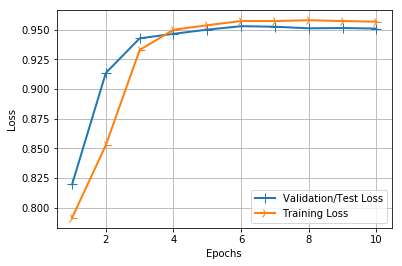

In [45]:
#ploting our loss

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values)+1)


line1 = plt.plot(epochs, val_acc_values, label ='Validation/Test Loss')
line2 = plt.plot(epochs, acc_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Classification Report and Confussion metrics

In [46]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3325  113]
 [ 108  954]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3438
           1       0.89      0.90      0.90      1062

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



# Deeper Model

In [47]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout


model2 = Sequential()

model2.add(Dense(100, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape = None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

           
        

W0121 20:53:12.990012 140390100375360 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [53]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1900      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [56]:
# Training our model

epochs = 25

history = model2.fit(X_train,
                     y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss :', score[0])
print('Test Accuracy :',score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 1s 132us/sample - loss: 0.1873 - acc: 0.9503 - val_loss: 0.2031 - val_acc: 0.9458
Epoch 2/25
10499/10499 [==============================] - 1s 136us/sample - loss: 0.1922 - acc: 0.9496 - val_loss: 0.1955 - val_acc: 0.9469
Epoch 3/25
10499/10499 [==============================] - 1s 124us/sample - loss: 0.1921 - acc: 0.9481 - val_loss: 0.1966 - val_acc: 0.9469
Epoch 4/25
10499/10499 [==============================] - 1s 128us/sample - loss: 0.1896 - acc: 0.9491 - val_loss: 0.1932 - val_acc: 0.9513
Epoch 5/25
10499/10499 [==============================] - 1s 129us/sample - loss: 0.1905 - acc: 0.9489 - val_loss: 0.1904 - val_acc: 0.9473
Epoch 6/25
10499/10499 [==============================] - 1s 135us/sample - loss: 0.1904 - acc: 0.9503 - val_loss: 0.1951 - val_acc: 0.9509
Epoch 7/25
10499/10499 [==============================] - 1s 135us/sample - loss: 0.1916 - acc: 0.9486 - val_lo